# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Load Data and split

In [2]:
# Load the dataset 
data = pd.read_csv('processed_data_Encoding.csv')

# Separate features and target
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target



In [3]:
# Apply SMOTE 
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X,y)


In [4]:
# Specify numerical columns for scaling and PCA
numerical_cols = ['age', 'balance', 'campaign', 'previous','balance_no_previous']

# scaling only to the specified numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [5]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(X[numerical_cols])

# Create a DataFrame with the principal components
pca_columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)

X = pd.concat([X, pca_df], axis=1)

In [6]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Trainning

In [7]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    class_weight='balanced',
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

Random Forest - Training Accuracy: 0.9453759804612277
Random Forest - Test Accuracy: 0.9164005260191621
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7923
           1       0.94      0.90      0.92      8046

    accuracy                           0.92     15969
   macro avg       0.92      0.92      0.92     15969
weighted avg       0.92      0.92      0.92     15969



In [8]:
# Get predicted probabilities for the positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9670682073596195


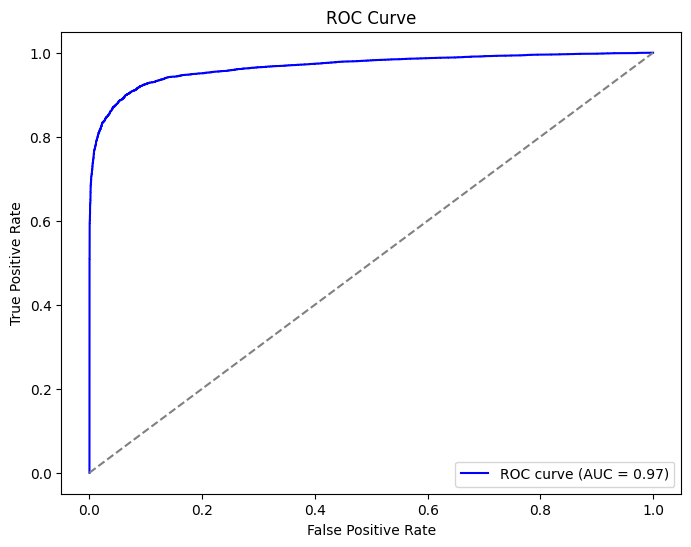

In [9]:
# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
